<a href="https://colab.research.google.com/github/mishathefirst/AI-Systems-LabWork-5/blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

  Using cached pip-20.3.1-py2.py3-none-any.whl (1.5 MB)
  Using cached pip-20.3.1.tar.gz (1.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pip-20.3-py2.py3-none-any.whl (1.5 MB)
  Using cached pip-20.3.tar.gz (1.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pip-20.2.4-py2.py3-none-any.whl (1.5 MB)
  Using cached pip-20.2.4.tar.gz (1.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pip-20.2.3-py2.py3-none-any.whl (1.5 MB)
  Using cached pip-20.2.3.tar.gz (1.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pip-20.2.2-py2.py3-none-any.whl (1.5 MB)
  Using cached pip-20.2.2.tar.gz (1.5 MB)
  Installi

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

MNIST - датасет образцов рукописного написания цифр, является стандартом, предложенным Национальным институтом стандартов и технологий США с целью калибрации и сопоставления методов распознавания изображений с помощью машинного обучения. Образцы из набора NIST были нормализированы, прошли сглаживание и приведены к серому полутоновому изображению размером 28x28 пикселей. 

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

Первый элемент

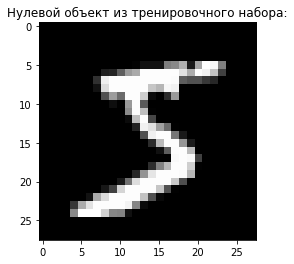

In [ ]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

И его отклик

In [ ]:
y_train[0]

6

Для разделения данных используем функцию train_test_split из библиотеки sklearn. Следующий код разделяет исходные данные в отношении 70/30.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=2020)
#x_test = X_test[:60000]
#y_test = y_test[:60000]

Преобразуем данные

In [ ]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
X_test = X_test.reshape(len(X_test), dim)
#x_test = X_test[::60000]
#y_test = Y_test[::60000]

ValueError: ignored

Уменьшим размерность тестовых данных

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)



Найдем долю объясненной дисперсии в зависимости от количества используемых ГК

In [ ]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance


array([0.097, 0.168, 0.23 , 0.284, 0.333, 0.376, 0.408, 0.437, 0.465,
       0.488])

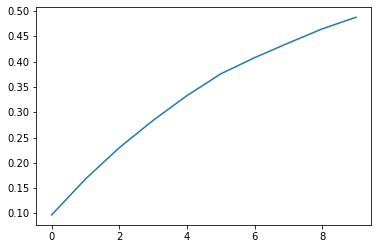

In [ ]:
plt.plot(np.arange(10), explained_variance, ls = '-')

Подключаем библиотеку для обучения многоклассового классификатора методом One-vs-All и дерево принятия решений

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=2020)
clf = OneVsRestClassifier(tree).fit(X_train, y_train)

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [ ]:
len(X_test[0])

784

In [ ]:
modelPCA = pca.fit(X_test) 
X_test = modelPCA.transform(X_test)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

In [ ]:
CM

array([[1159,    1,   22,    5,   15,   30,   32,   11,    6,   12],
       [   0,   95,   10,    4,  378,    0,    7,  685,    1,  236],
       [  21,    0,  670,   19,  218,    6,  100,  111,   45,   72],
       [   7,    1,   19,  221,  149,   88,   10,  312,   53,  430],
       [   3,   23,  496,  150,   31,   44,   97,    1,  362,    7],
       [  49,    0,   30,   10,   39,  792,   24,   79,   36,   99],
       [   7,    0,  142,    0,  103,   13,  919,    9,    1,   10],
       [  45,   93,  132,  775,    7,   52,    5,  119,   87,    3],
       [   5,    0,   20,   29,  116,   38,    4,   44,  637,  295],
       [   7,   41,  202,  251,   10,  131,   25,   15,  548,   27]])

Число верно классифицирвоанных объектов класс 0

In [ ]:
CM[0][0]

1159

Число объектов класс 0 отнесенных к классу 8

In [ ]:
CM[0][8]

6